In [5]:
import pandas as pd

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [8]:
data_df = pd.read_csv('../predicting-satisfaction-using-graphs/csv/dataset/avg_satisfaction_raw_0-999.csv', encoding='ISO-8859-1')

In [9]:
data_df

,Unnamed: 0,user_key,userId,labelCount,postIndex,post_id,commentId,replyId,postContent,commentContent,...,satisfy_1_same,avg_satisfy_2,avg_satisfy_3,avg_satisfy_4,satisfy_composite,keywordSatisfaction,keywordPoliteness,politeness,quality_check,time
0,0,0b5a84a5,1162,1,0,112354,c6irl1u,c6iro6u,Third year college student. My depression has ...,One thing I am going to commend you on not exc...,...,2,3.2,3.4,3.0,3.15,['None'],['None'],2,1,72
1,5,60f3fe29,1058,4,1,ab42bx,ecxd281,ecxdj3z,"I don't really know why, and maybe it's just m...",I use to love taking cold showers when I was y...,...,5,3.8,3.6,5.0,4.25,"[""How'd you""]","[""How'd you""]",5,1,66
2,10,faf0441b,1057,5,2,b9hq37,ek4ufjx,ek5x9cg,I am 30 years old and my girlfriend is 24 are ...,"Depression is not an excuse for this behavior,...",...,7,5.4,5.2,4.8,5.35,['Thank you'],['Thank you'],7,1,99
3,15,60f3fe29,1058,5,3,1zair5,cfsdnqg,cfsfm1y,"Almost every day for months, I've gone to a se...",Then you have nothing to lose. Tell her dude.,...,4,2.8,3.6,4.0,3.30,"[""I just can't"", ""I'm just way too shy""]","[""I just can't""]",5,1,117
4,20,11a9702c,1060,1,4,8x4657,e20p9d1,e20rtes,Can you love when you're depressed? When depre...,"Yes, of course. I think it is because we love ...",...,6,3.4,4.0,4.4,3.80,[],[],5,1,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4975,becce612,2455,2,995,850z1t,dvtx979,dvtxca8,Well yeah title says it all. The other night I...,IÃ¢ÂÂm not trying to be rude or scare you at...,...,7,5.4,6.0,6.0,5.95,['Thank you.'],"['no worries', 'Thank you.']",6,1,91
996,4980,6c280aec,2456,4,996,714ku2,dn846eq,dn84ccm,"Yeah, how great, how lucky I am. When I finall...",Why do you think you are sensitive and cursed?...,...,4,4.2,4.4,4.4,4.30,['nothing'],['always'],3,1,483
997,4985,d50143d1,2469,4,997,6vu67q,dm33agq,dm68grt,"I've felt reluctant to post here, given that o...",Life is so unfair but you need to get your shi...,...,5,4.0,4.4,4.4,4.30,"[""Thanks for your reply. I don't know if it's ...",['Thanks for your reply'],6,1,30
998,4990,d6a629f0,2457,2,998,8lezdr,dzf2try,dzf31es,IÃ¢ÂÂm a 32 year old man. I have been extrem...,Same for me. Im too ugly for a girl to love me.,...,5,3.2,4.0,5.2,4.25,"['looking', 'mentally']","['issue', 'Between']",4,1,37


In [52]:
list_satisfaction = list(data_df['satisfy_composite'])
list_tag = list(data_df['postIndex'])
list_post = list(data_df['postContent'])
list_comment = list(data_df['commentContent'])

In [22]:
list_content = []
for p, c in zip(list_post, list_comment):
    list_content.append(p+' '+c)

# Doc2Vec

In [87]:
def train_doc2vec(data, tag, model_name):
    tagged_data = [TaggedDocument(words=word_tokenize(term.lower()), tags=[tag[i]]) for i, term in enumerate(data)]
    
    max_epochs = 500
    vec_size = 100
    alpha = 0.025

    model = Doc2Vec(vector_size=vec_size,
                   alpha=alpha,
                   min_alpha=0.00025,
                   min_count=1,
                   dm=1)

    model.build_vocab(tagged_data)
    
    for epoch in range(max_epochs):
        if epoch % 100 == 0:
            print('iteration {0}'.format(epoch))
    
        model.train(tagged_data,
                   total_examples=model.corpus_count,
                   epochs=model.epochs)
    
        model.alpha -= 0.0002
        model.min_alpha = model.alpha
    
    model.save(f"{model_name}")
    
    embeddings = []
    for i in range(1000):
        embeddings.append(list(model.dv[i]))
        
    tsne = TSNE(random_state = 42)
    data_tsne = tsne.fit_transform(embeddings)
    
    x_for_tsne = []
    y_for_tsne = []

    for xy in data_tsne:
        x_for_tsne.append(xy[0])
        y_for_tsne.append(xy[1])
        
    return x_for_tsne, y_for_tsne

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400


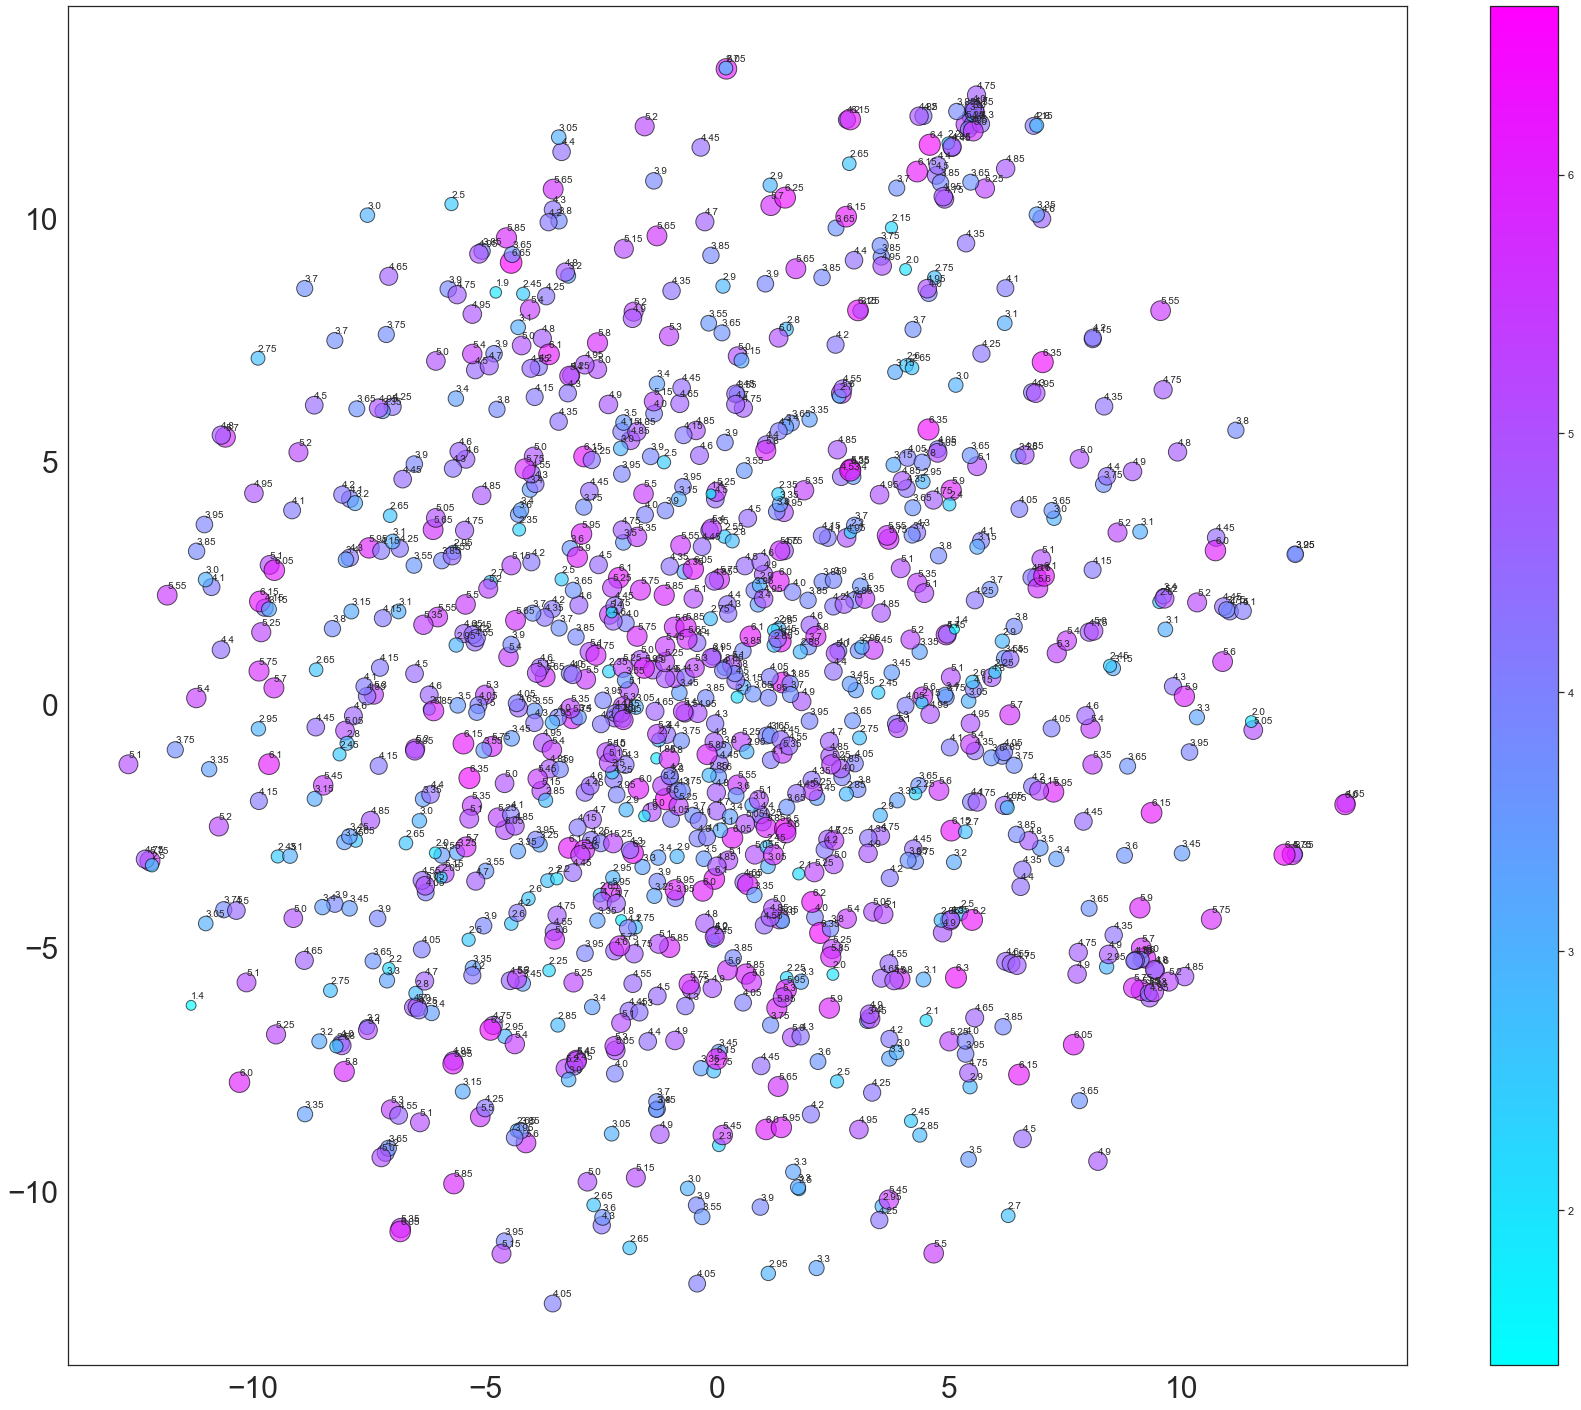

In [91]:
x_for_tsne, y_for_tsne = train_doc2vec(list_content, list_tag, "post_comment.model")
t_sne(x_for_tsne, y_for_tsne, list_satisfaction, 'x', 'y')

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400


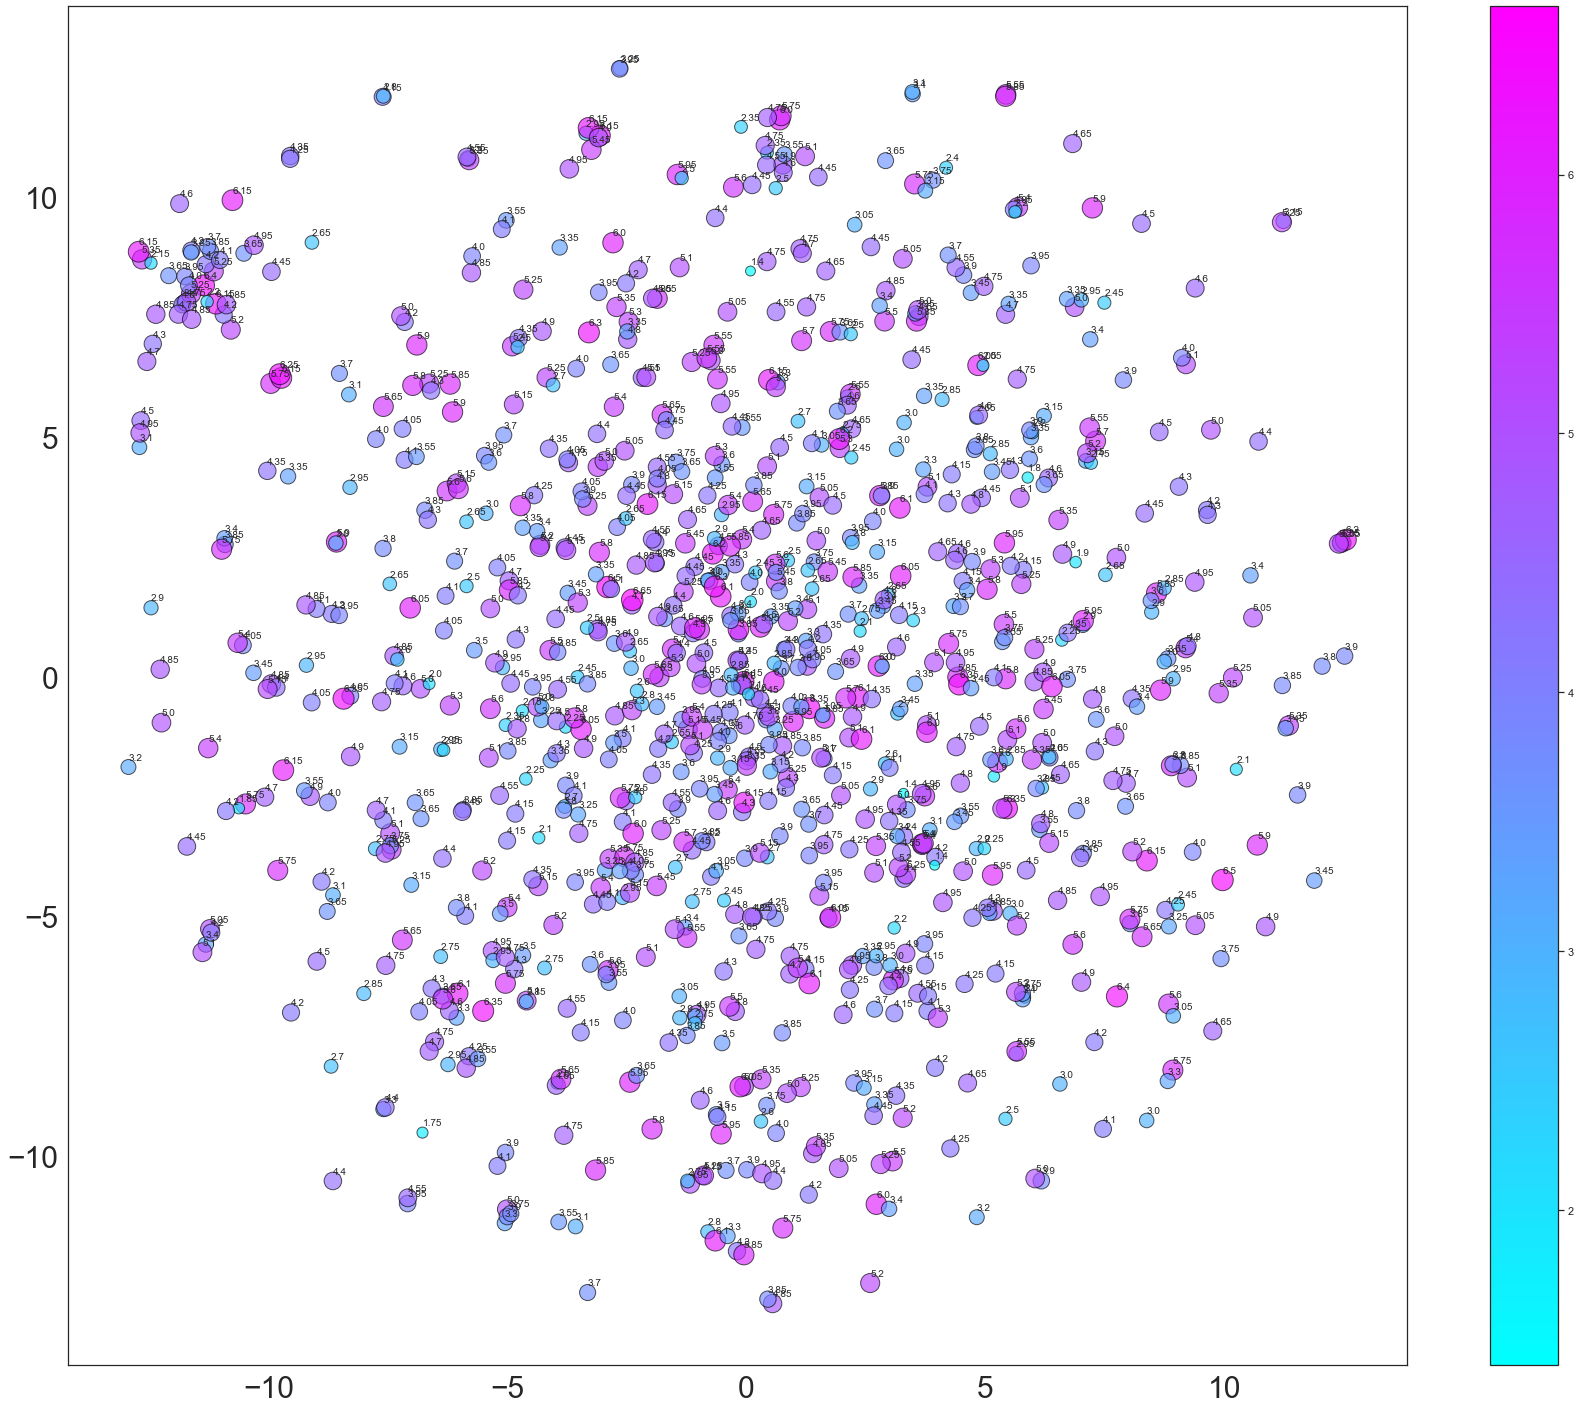

In [92]:
x_for_tsne, y_for_tsne = train_doc2vec(list_post, list_tag, "post.model")
t_sne(x_for_tsne, y_for_tsne, list_satisfaction, 'x', 'y')

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400


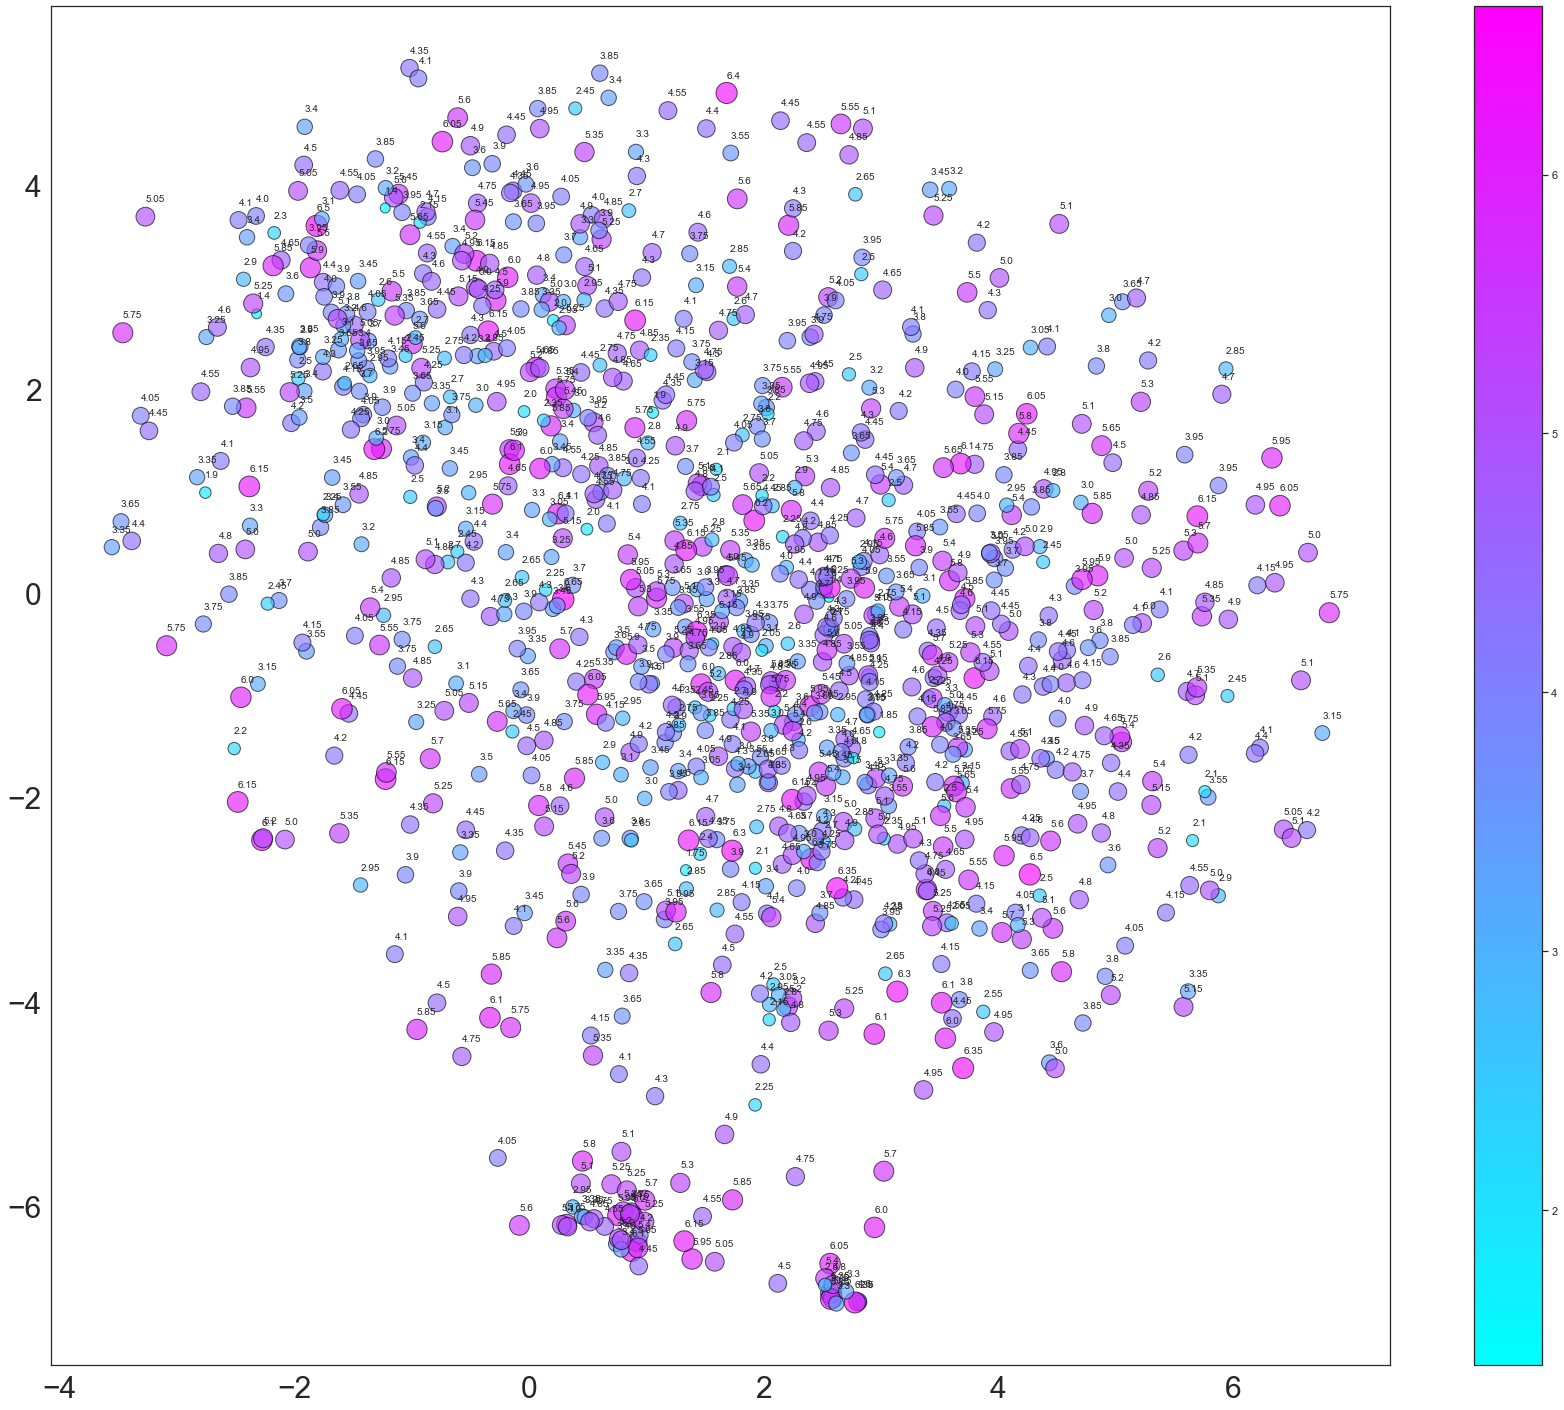

In [93]:
x_for_tsne, y_for_tsne = train_doc2vec(list_comment, list_tag, "comment.model")
t_sne(x_for_tsne, y_for_tsne, list_satisfaction, 'x', 'y')

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
def t_sne(x, y, score, xlabel, ylabel):
    size = list(map(lambda x:x*70, score))
    
    minsize = min(size)
    maxsize = max(size)

    tsne_df = pd.DataFrame({'x': x, 'y': y, 'color': score, 'size': size})

    fig, ax = plt.subplots()

    # set before set_style
    sns.set(rc={'figure.figsize':(30,25)})
    sns.set_style("white")

    ax = sns.scatterplot(x = 'x', y = 'y', hue="color", size = "size", data=tsne_df, palette='cool', 
                        sizes=(minsize, maxsize), alpha=0.65, edgecolor="black", linewidth=1, legend = False)
    
    for i, s in enumerate(score):
        ax.annotate(round(s, 2), (x[i], y[i]+0.15), fontsize=10)

    ax.set(xlabel=None, ylabel=None)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)

    sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, 
                            norm=plt.Normalize(vmin=min(score), vmax=max(score)))

    cbar = fig.colorbar(sm)

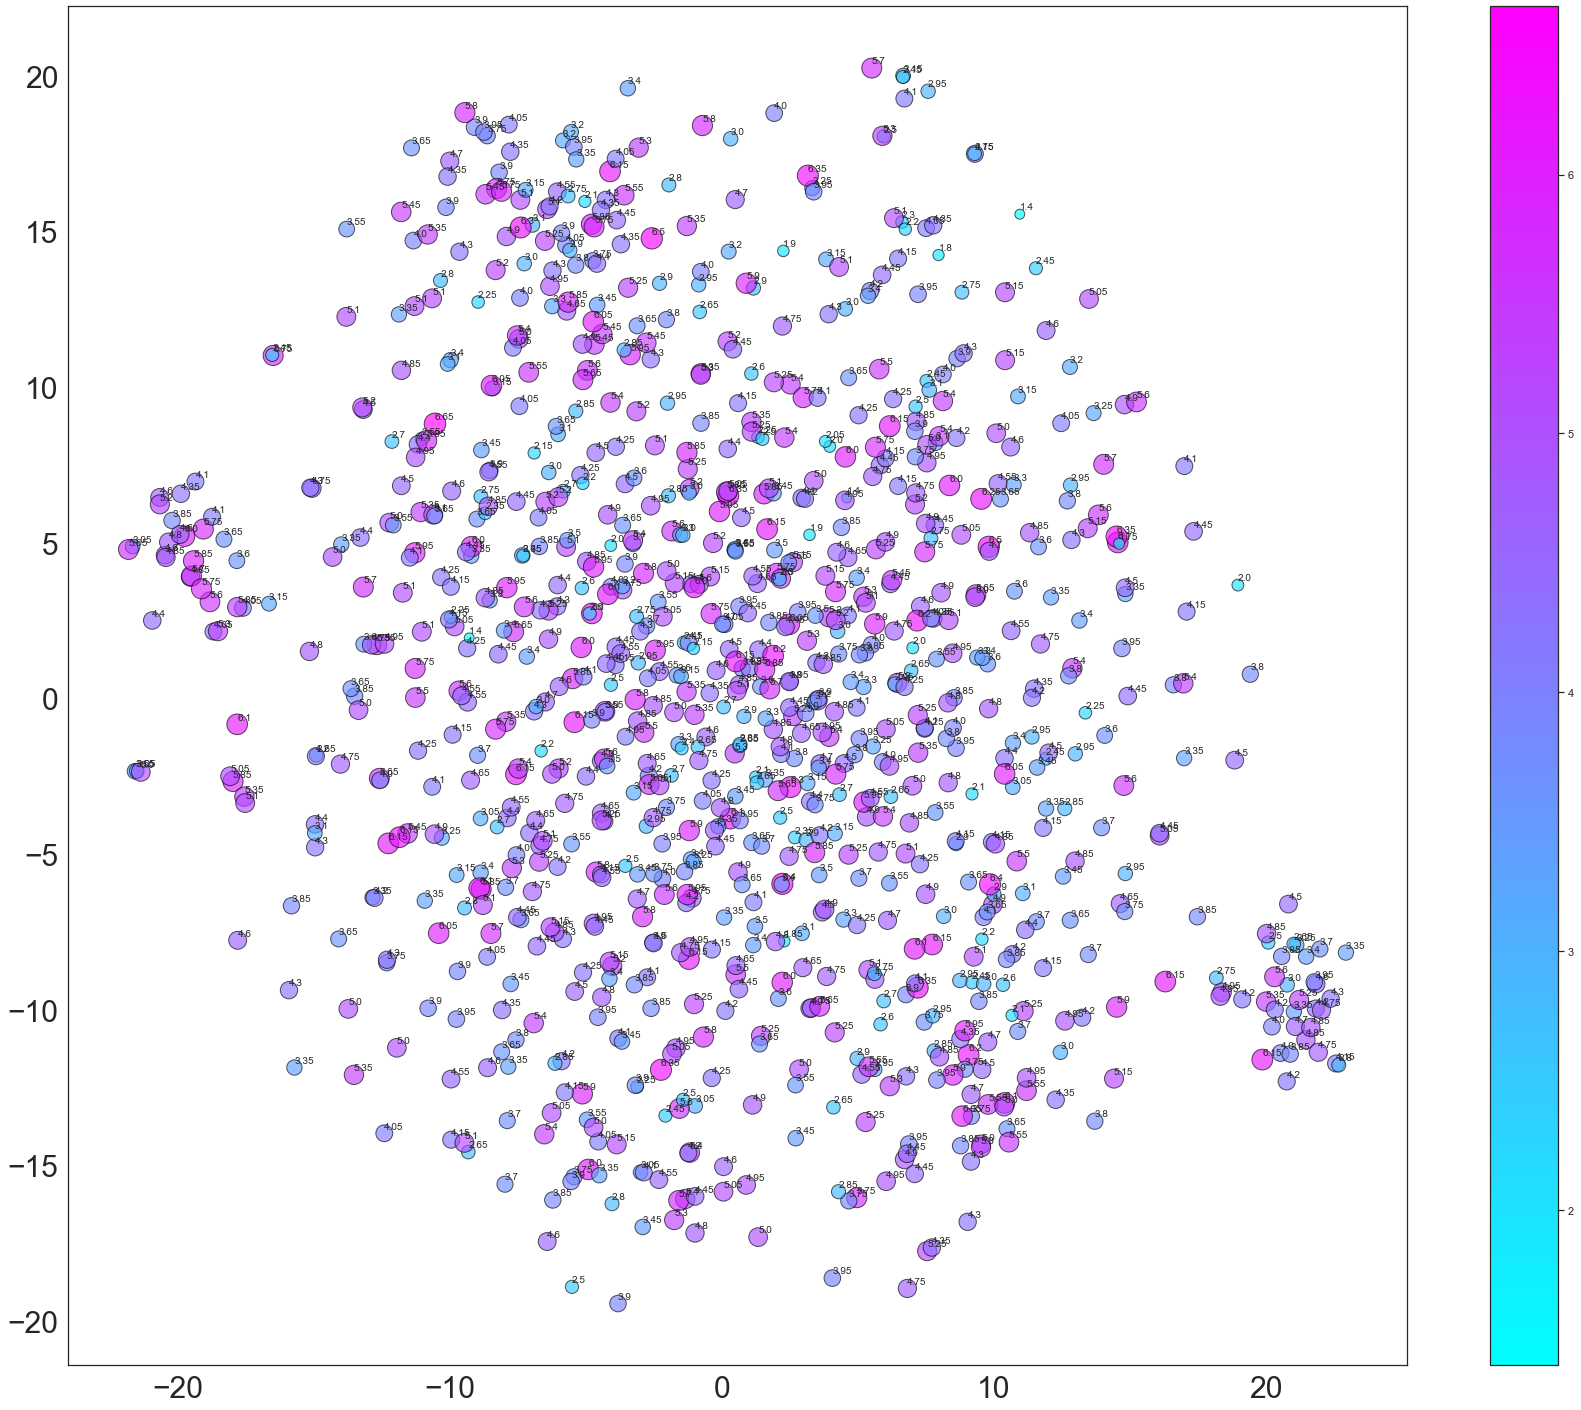

In [90]:
t_sne(x_for_tsne, y_for_tsne, list_satisfaction, 'x', 'y')

# Word2Vec